## أمثلة أساسية على Pandas

سيرشدك هذا الدفتر إلى بعض المفاهيم الأساسية جدًا في Pandas. سنبدأ باستيراد مكتبات علوم البيانات النموذجية:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### السلسلة

السلسلة تشبه القائمة أو المصفوفة أحادية البعد، لكنها تحتوي على فهرس. جميع العمليات تكون متوافقة مع الفهرس.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


أحد الاستخدامات الشائعة للسلاسل هو **السلاسل الزمنية**. في السلاسل الزمنية، يكون للفهرس بنية خاصة - عادةً ما يكون نطاقًا من التواريخ أو الأوقات. يمكننا إنشاء مثل هذا الفهرس باستخدام `pd.date_range`.

لنفترض أن لدينا سلسلة تُظهر كمية المنتج التي يتم شراؤها كل يوم، ونعلم أنه في كل يوم أحد نحتاج أيضًا إلى أخذ عنصر واحد لأنفسنا. إليك كيفية نمذجة ذلك باستخدام السلاسل:


Length of index is 366


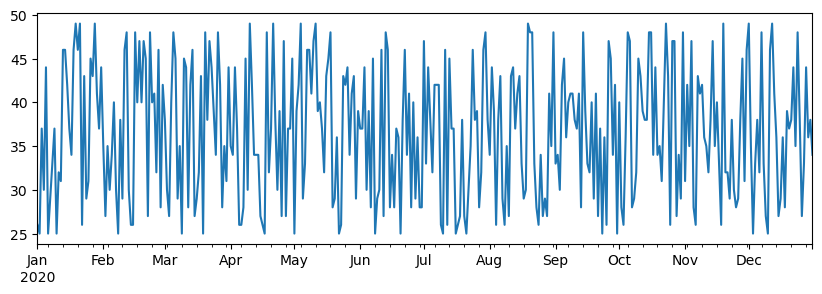

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


كما ترى، نحن نواجه مشاكل هنا، لأن الأيام غير المذكورة في السلسلة الأسبوعية تعتبر مفقودة (`NaN`)، وإضافة `NaN` إلى رقم يعطينا `NaN`. للحصول على النتيجة الصحيحة، نحتاج إلى تحديد `fill_value` عند إضافة السلاسل:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


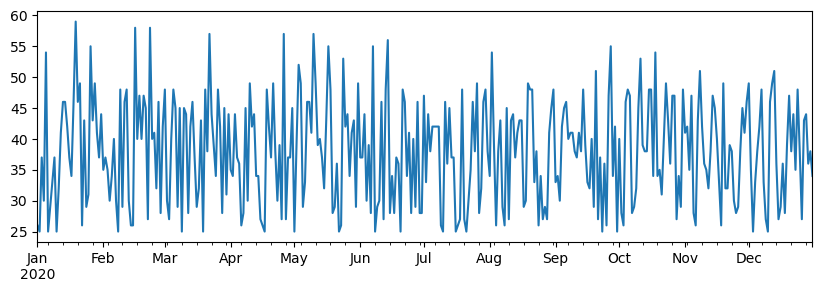

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

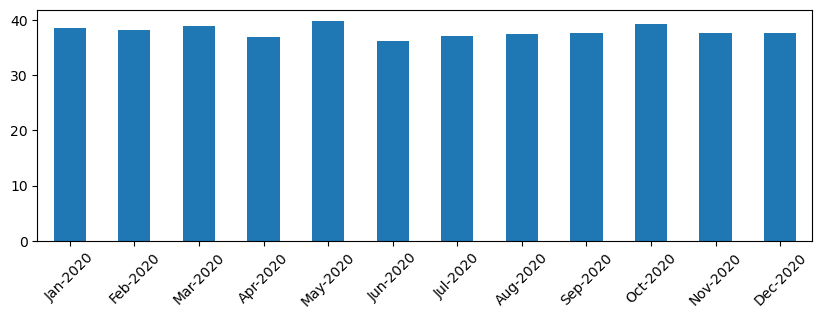

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## إطار البيانات

إطار البيانات هو في الأساس مجموعة من السلاسل التي تشترك في نفس الفهرس. يمكننا دمج عدة سلاسل معًا في إطار بيانات. بالنظر إلى السلسلتين `a` و `b` المعرفة أعلاه:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

يمكننا أيضًا استخدام السلاسل كأعمدة، وتحديد أسماء الأعمدة باستخدام القاموس:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

يمكن تحقيق نفس النتيجة عن طريق تبديل المواقع (ثم إعادة تسمية الأعمدة لتتطابق مع المثال السابق):


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

**اختيار الأعمدة** من DataFrame يمكن القيام به بهذه الطريقة:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**اختيار الصفوف** بناءً على تعبير الفلترة:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

يعمل هذا الأسلوب بحيث أن التعبير `df['A']<5` يعيد سلسلة بوليانية، والتي تشير إلى ما إذا كان التعبير `True` أو `False` لكل عنصر من عناصر السلسلة. عندما تُستخدم السلسلة كمؤشر، فإنها تعيد مجموعة فرعية من الصفوف في DataFrame. لذلك، لا يمكن استخدام تعبير بولياني عشوائي في بايثون، على سبيل المثال، كتابة `df[df['A']>5 and df['A']<7]` سيكون خطأ. بدلاً من ذلك، يجب استخدام عملية خاصة `&` على السلاسل البوليانية:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

**إنشاء أعمدة قابلة للحساب جديدة**. يمكننا بسهولة إنشاء أعمدة قابلة للحساب جديدة لإطار البيانات الخاص بنا باستخدام تعبيرات بديهية. الكود أدناه يحسب التباعد لـ A عن قيمته المتوسطة.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

ما يحدث فعليًا هو أننا نحسب سلسلة، ثم نُعيّن هذه السلسلة إلى الجانب الأيسر، مما يؤدي إلى إنشاء عمود آخر.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

يمكن اختيار الصفوف بناءً على الأرقام باستخدام بناء `iloc`. على سبيل المثال، لاختيار أول 5 صفوف من DataFrame:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**التجميع** يُستخدم غالبًا للحصول على نتيجة مشابهة لـ *جداول المحورية* في Excel. لنفترض أننا نريد حساب القيمة المتوسطة للعمود `A` لكل رقم معين من `LenB`. يمكننا حينها تجميع DataFrame الخاص بنا بواسطة `LenB`، واستدعاء `mean`:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

إذا كنا بحاجة إلى حساب المتوسط وعدد العناصر في المجموعة، فيمكننا استخدام دالة `aggregate` الأكثر تعقيدًا:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## الطباعة والرسم البياني

غالبًا ما يحتاج عالم البيانات إلى استكشاف البيانات، لذلك من المهم أن يكون قادرًا على تصورها. عندما يكون DataFrame كبيرًا، نرغب في كثير من الأحيان فقط في التأكد من أننا نقوم بكل شيء بشكل صحيح عن طريق طباعة الصفوف الأولى. يمكن القيام بذلك عن طريق استدعاء `df.head()`. إذا كنت تستخدم Jupyter Notebook، فسيتم طباعة DataFrame في شكل جدولي جميل.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

لقد رأينا أيضًا استخدام دالة `plot` لتصور بعض الأعمدة. بينما تعتبر `plot` مفيدة جدًا للعديد من المهام، وتدعم أنواعًا مختلفة من الرسوم البيانية عبر المعامل `kind=`، يمكنك دائمًا استخدام مكتبة `matplotlib` الخام لرسم شيء أكثر تعقيدًا. سنغطي تصور البيانات بالتفصيل في دروس منفصلة من الدورة.


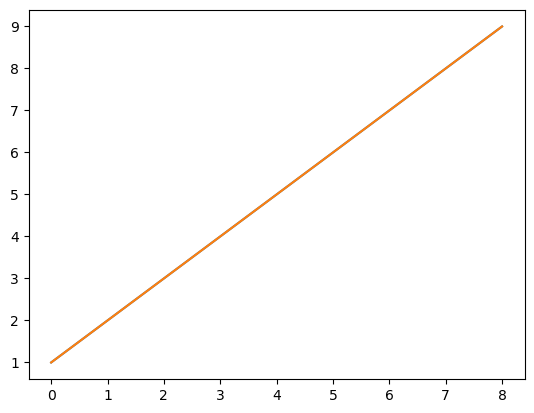

In [61]:
df['A'].plot()
plt.show()

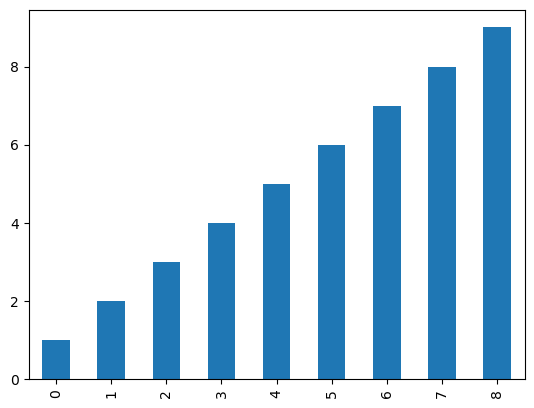

In [63]:
df['A'].plot(kind='bar')
plt.show()

يغطي هذا العرض أهم مفاهيم مكتبة Pandas، ومع ذلك فإن المكتبة غنية جدًا ولا حدود لما يمكنك تحقيقه باستخدامها! دعونا الآن نطبق هذه المعرفة لحل مشكلة محددة.



---

**إخلاء المسؤولية**:  
تم ترجمة هذا المستند باستخدام خدمة الترجمة بالذكاء الاصطناعي [Co-op Translator](https://github.com/Azure/co-op-translator). بينما نسعى لتحقيق الدقة، يرجى العلم أن الترجمات الآلية قد تحتوي على أخطاء أو معلومات غير دقيقة. يجب اعتبار المستند الأصلي بلغته الأصلية المصدر الرسمي. للحصول على معلومات حاسمة، يُوصى بالاستعانة بترجمة بشرية احترافية. نحن غير مسؤولين عن أي سوء فهم أو تفسيرات خاطئة ناتجة عن استخدام هذه الترجمة.
